# ПЗ 2. Масштабирование признаков. Регуляризация. Стохастический градиентный спуск.

In [13]:
import numpy as np
import matplotlib.pyplot as plt

In [14]:
X = np.array([[   1,    1,  500,    1],
              [   1,    1,  700,    1],
              [   1,    2,  750,    2],
              [   1,    5,  600,    1],
              [   1,    3, 1450,    2],
              [   1,    0,  800,    1],
              [   1,    5, 1500,    3],
              [   1,   10, 2000,    3],
              [   1,    1,  450,    1],
              [   1,    2, 1000,    2]])

In [15]:
y = [45, 55, 50, 55, 60, 35, 75, 80, 50, 60]

In [16]:
X[:, 1].min(), X[:, 1].max()

(0, 10)

In [17]:
X[:, 2].min(), X[:, 2].max()

(450, 2000)

In [18]:
def min_max_scale(X):
    return (X - X.min()) / (X.max() - X.min())

In [19]:
X_norm = X.copy()
X_norm = X_norm.astype(np.float64)
X_norm

array([[1.00e+00, 1.00e+00, 5.00e+02, 1.00e+00],
       [1.00e+00, 1.00e+00, 7.00e+02, 1.00e+00],
       [1.00e+00, 2.00e+00, 7.50e+02, 2.00e+00],
       [1.00e+00, 5.00e+00, 6.00e+02, 1.00e+00],
       [1.00e+00, 3.00e+00, 1.45e+03, 2.00e+00],
       [1.00e+00, 0.00e+00, 8.00e+02, 1.00e+00],
       [1.00e+00, 5.00e+00, 1.50e+03, 3.00e+00],
       [1.00e+00, 1.00e+01, 2.00e+03, 3.00e+00],
       [1.00e+00, 1.00e+00, 4.50e+02, 1.00e+00],
       [1.00e+00, 2.00e+00, 1.00e+03, 2.00e+00]])

In [20]:
X_norm[:, 1] = min_max_scale(X_norm[:, 1])
X_norm[:, 2] = min_max_scale(X_norm[:, 2])
X_norm[:, 3] = min_max_scale(X_norm[:, 3])
X_norm

array([[1.        , 0.1       , 0.03225806, 0.        ],
       [1.        , 0.1       , 0.16129032, 0.        ],
       [1.        , 0.2       , 0.19354839, 0.5       ],
       [1.        , 0.5       , 0.09677419, 0.        ],
       [1.        , 0.3       , 0.64516129, 0.5       ],
       [1.        , 0.        , 0.22580645, 0.        ],
       [1.        , 0.5       , 0.67741935, 1.        ],
       [1.        , 1.        , 1.        , 1.        ],
       [1.        , 0.1       , 0.        , 0.        ],
       [1.        , 0.2       , 0.35483871, 0.5       ]])

3.0


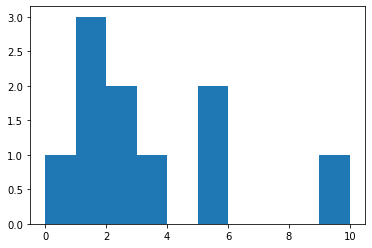

In [21]:
print(np.mean(X[:, 1]))
plt.hist(X[:, 1])
plt.show()

975.0


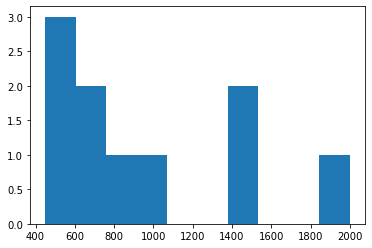

In [22]:
print(np.mean(X[:, 2]))
plt.hist(X[:, 2])
plt.show()

In [23]:
def standard_scale(X):
    mean = X.mean()
    std = X.std()
    return (X - mean) / std

In [24]:
X_st = X.copy().astype(np.float64)
X_st[:, 1] = standard_scale(X_st[:, 1])
X_st[:, 2] = standard_scale(X_st[:, 2])
X_st[:, 3] = standard_scale(X_st[:, 3])

X_st

array([[ 1.        , -0.70710678, -0.97958969, -0.89625816],
       [ 1.        , -0.70710678, -0.56713087, -0.89625816],
       [ 1.        , -0.35355339, -0.46401617,  0.38411064],
       [ 1.        ,  0.70710678, -0.77336028, -0.89625816],
       [ 1.        ,  0.        ,  0.97958969,  0.38411064],
       [ 1.        , -1.06066017, -0.36090146, -0.89625816],
       [ 1.        ,  0.70710678,  1.08270439,  1.66447944],
       [ 1.        ,  2.47487373,  2.11385144,  1.66447944],
       [ 1.        , -0.70710678, -1.08270439, -0.89625816],
       [ 1.        , -0.35355339,  0.05155735,  0.38411064]])

4.4408920985006264e-17
1.0


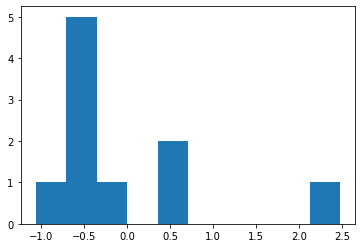

In [25]:
print(np.mean(X_st[:, 1]))
print(np.std(X_st[:, 1]))

plt.hist(X_st[:, 1])
plt.show()

-4.163336342344337e-17
0.9999999999999999


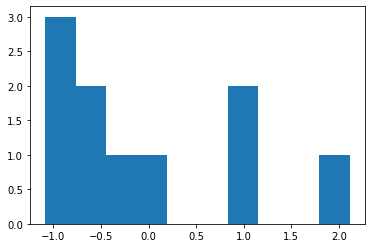

In [26]:
print(np.mean(X_st[:, 2]))
print(np.std(X_st[:, 2]))

plt.hist(X_st[:, 2])
plt.show()

In [27]:
def calc_mse(y, y_pred):
    err = np.mean((y - y_pred)**2)
    return err

In [28]:
W = np.random.randn(X.shape[1])
W

array([ 0.49671415, -0.1382643 ,  0.64768854,  1.52302986])

In [29]:
# классический  GD
def gradient_descent(X, y, iterations, eta=1e-4):
    W = np.random.randn(X.shape[1])
    n = X.shape[0]
    
    for i in range(0, iterations):
        y_pred = np.dot(X, W)
        err = calc_mse(y, y_pred)
        dQ = 2/n * X.T @ (y_pred - y) # градиент функции ошибки
        W -= (eta * dQ)
        if i % (iterations / 10) == 0:
            print(f'Iter: {i}, weights: {W}, error {err}')
    print(f'Final MSE: {calc_mse(y, np.dot(X, W))}')
    return W

In [30]:
gradient_descent(X_st, y, iterations=5000, eta=1e-2)

Iter: 0, weights: [ 0.90052969 -0.04965974  1.74642798  0.94371313], error 3338.9405464380093
Iter: 500, weights: [56.49771909  5.83619534  1.36415346  5.25664189], error 25.411703243364382
Iter: 1000, weights: [56.49999991  6.17153363  0.25144169  6.07516451], error 24.9695184583205
Iter: 1500, weights: [56.5         6.25760706 -0.13819197  6.39165381], error 24.913025046761714
Iter: 2000, weights: [56.5         6.28681659 -0.27788074  6.50669045], error 24.905707957390938
Iter: 2500, weights: [56.5         6.29723965 -0.32813205  6.54815417], error 24.904759975904035
Iter: 3000, weights: [56.5         6.3009867  -0.34621813  6.56308162], error 24.90463715740176
Iter: 3500, weights: [56.5         6.30233518 -0.35272799  6.56845478], error 24.904621245291224
Iter: 4000, weights: [56.5         6.30282055 -0.35507115  6.57038881], error 24.90461918375115
Iter: 4500, weights: [56.5         6.30299525 -0.35591456  6.57108495], error 24.904618916662287
Final MSE: 24.904618882058816


array([56.5       ,  6.30305806, -0.35621778,  6.57133523])

In [31]:
# стохастический градиентный спуск
def stohastic_gradient_descent(X, y, iterations, size, eta=1e-4):
    W = np.random.randn(X.shape[1])
    n = X.shape[0]
    
    for i in range(0, iterations):
        inds = np.random.randint(n, size=size)

        X_tmp = X[inds, ]
        y_tmp = np.array(y)[inds]


        y_pred_tmp = np.dot(X_tmp, W)
        dQ = 2/len(y_tmp) * X_tmp.T @ (y_pred_tmp - y_tmp) # градиент функции ошибки
        W -= (eta * dQ)

        err = calc_mse(y, np.dot(X, W))

        if i % (iterations / 10) == 0:
            print(f'Iter: {i}, weights: {W}, error {err}')
    
    print(f'Final MSE: {calc_mse(y, np.dot(X, W))}')
    return W

In [32]:
stohastic_gradient_descent(X_st, y, iterations=5000, size=4, eta=1e-2)

Iter: 0, weights: [ 0.48672601 -0.08866775 -1.00235298 -0.9330898 ], error 3344.578807600405
Iter: 500, weights: [56.74713142  6.00135694  0.72709056  5.87426299], error 25.162610960324802
Iter: 1000, weights: [ 5.63553153e+01  6.50834838e+00 -5.25670103e-02  6.28203270e+00], error 24.998729772715357
Iter: 1500, weights: [56.36317248  6.6238632  -0.54543719  6.86305609], error 25.089166865456225
Iter: 2000, weights: [56.66491748  6.23456228 -0.3803288   6.65591377], error 24.93480272021616
Iter: 2500, weights: [56.17044639  6.59840538 -0.35186322  6.80405367], error 25.25800933599721
Iter: 3000, weights: [56.5957557   6.31176944 -0.66885631  6.94777325], error 24.94401002386954
Iter: 3500, weights: [56.34983214  6.44906462 -0.32292243  6.70766826], error 25.012724480174864
Iter: 4000, weights: [56.17201709  6.34264057 -0.14211933  6.53907452], error 25.05977014986414
Iter: 4500, weights: [56.27107486  6.31075513 -0.12858269  6.45927497], error 24.97750312287179
Final MSE: 24.9479798344

array([56.5921025 ,  6.30954882, -0.43163423,  6.44993503])

##### L1 регуляризация
$$Q(w, X) + \lambda |w| \rightarrow \underset{w}{\text{min}}.$$
Про производную можно посмотреть [здесь](https://youtu.be/dHhYHGI9E6I).
##### L2 регуляризация
регуляризация
$$Q(w, X) + \lambda ||w||^{2} \rightarrow \underset{w}{\text{min}}.$$
​
<center>Производная</center>
​
$$d\lambda ||w||^{2} = 2\lambda w $$


In [34]:
def gradient_descent_reg_l2(X, y, iterations, eta=1e-4, reg=1e-8):
    W = np.random.randn(X.shape[1])
    n = X.shape[0]
    
    for i in range(0, iterations):
        y_pred = np.dot(X, W)
        err = calc_mse(y, y_pred)
        
        dQ = 2/n * X.T @ (y_pred - y) # градиент функции ошибки
        dReg = reg * W # градиент регуляризации
        
        W -= eta * (dQ + dReg)
        
        if i % (iterations / 10) == 0:
            print(f'Iter: {i}, weights: {W}, error {err}')
    
    print(f'Final MSE: {calc_mse(y, np.dot(X, W))}')
    return W

In [35]:
gradient_descent_reg_l2(X_st, y, iterations=5000, eta=1e-1, reg=1e-4)

Iter: 0, weights: [10.58782352  1.41535527  1.02903143  3.01023679], error 3499.4677275607246
Iter: 500, weights: [56.49717514  6.30232472 -0.35427573  6.56981299], error 24.90462772245524
Iter: 1000, weights: [56.49717514  6.30234588 -0.35437787  6.5698973 ], error 24.904627646691267
Iter: 1500, weights: [56.49717514  6.30234588 -0.35437787  6.5698973 ], error 24.90462764668883
Iter: 2000, weights: [56.49717514  6.30234588 -0.35437787  6.5698973 ], error 24.904627646688827
Iter: 2500, weights: [56.49717514  6.30234588 -0.35437787  6.5698973 ], error 24.904627646688827
Iter: 3000, weights: [56.49717514  6.30234588 -0.35437787  6.5698973 ], error 24.904627646688827
Iter: 3500, weights: [56.49717514  6.30234588 -0.35437787  6.5698973 ], error 24.904627646688827
Iter: 4000, weights: [56.49717514  6.30234588 -0.35437787  6.5698973 ], error 24.904627646688827
Iter: 4500, weights: [56.49717514  6.30234588 -0.35437787  6.5698973 ], error 24.904627646688827
Final MSE: 24.904627646688827


array([56.49717514,  6.30234588, -0.35437787,  6.5698973 ])

In [36]:
gradient_descent(X_st, y, iterations=5000, eta=1e-1)

Iter: 0, weights: [9.85651938 3.31137661 1.88185283 1.63541537], error 3543.0137397142416
Iter: 500, weights: [56.5         6.30306585 -0.35625542  6.57136629], error 24.904618880173842
Iter: 1000, weights: [56.5         6.30309349 -0.35638884  6.57147642], error 24.90461887690839
Iter: 1500, weights: [56.5         6.30309349 -0.35638885  6.57147643], error 24.904618876908383
Iter: 2000, weights: [56.5         6.30309349 -0.35638885  6.57147643], error 24.90461887690838
Iter: 2500, weights: [56.5         6.30309349 -0.35638885  6.57147643], error 24.90461887690838
Iter: 3000, weights: [56.5         6.30309349 -0.35638885  6.57147643], error 24.90461887690838
Iter: 3500, weights: [56.5         6.30309349 -0.35638885  6.57147643], error 24.90461887690838
Iter: 4000, weights: [56.5         6.30309349 -0.35638885  6.57147643], error 24.90461887690838
Iter: 4500, weights: [56.5         6.30309349 -0.35638885  6.57147643], error 24.90461887690838
Final MSE: 24.90461887690838


array([56.5       ,  6.30309349, -0.35638885,  6.57147643])

## Практическое задание

1. Напишите функцию наподобие gradient_descent_reg_l2, но для применения L1-регуляризации.

In [37]:
from sklearn.datasets import make_regression
from mpl_toolkits.mplot3d.axes3d import Axes3D

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

np.random.seed(42)

In [38]:
def gradient_descent_reg_l1(X, y, iters, eta=1e-4, reg=1e-8):
    W = np.random.randn(X.shape[1])
    n = X.shape[0]
    for i in range(0, iters):
        y_pred = np.dot(X, W)
        err = calc_mse(y, y_pred)
        dQ = 2/n * X.T @ (y_pred - y)
        # производная от sign
        dReg = reg * np.sign(W)
        #
        W -= eta * dQ + dReg
    return W

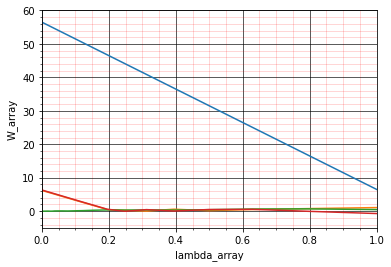

In [39]:
W = gradient_descent_reg_l1(X_st, y, iters=5000, eta=1e-2, reg=1e-4)
lambda_array = np.logspace(-10, 0, 100)
W_array = []

for lambda_ in lambda_array:
    W_temp = gradient_descent_reg_l1(X_st, y, iters=7500, eta=1e-2, reg=lambda_)
    W_array.append(W_temp)

W_array = np.array(W_array)

for i in range(len(W_array[0])):
    plt.plot(lambda_array, W_array[:, i])

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 35
fig_size[1] = 10
plt.rcParams["figure.figsize"] = fig_size
plt.xlabel('lambda_array')
plt.ylabel('W_array')
plt.ylim(-5, 60)
plt.xlim(0, 1)
plt.grid(b=True, which='major', color='k', linestyle='-', alpha=0.8)
plt.grid(b=True, which='minor', color='r', linestyle='-', alpha=0.2)
plt.minorticks_on()
plt.show()

2. *Можно ли к одному и тому же признаку применить сразу и нормализацию, и стандартизацию?

**Только последовательно**